In [240]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from collections import Counter

## ANS 1 A

In [1]:
import numpy as np

A = np.array([1, 7, 9, 2, 0.1, 17, 17, 1.5])
k = 3

idx = np.argpartition(A, k)
print(idx)

[4 0 7 3 1 2 6 5]


In [229]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    #print(instance1)
    for x in range(1,length):
        distance += pow((instance1[x] - instance2[x]), 2)
    print(distance)
    return math.sqrt(distance)
def KNN_predict(train_X, train_Y, test_X, K,length, distance_metric):
    #length = 7
    predict = []
    print(distance_metric)
  
    if distance_metric=="Euclidean":
            for point in test_X:
                dis= list()
                mean = 0
                idx = []
                for tp in train_X:
                    distance = 0
                    for x in range(1,length):
                            distance += pow((point[x] - tp[x]), 2)
                    dis.append(distance)
                idx = np.argpartition(dis, k)
                c = 0
                for j in idx:
                    if j<k:
                        mean = mean + train_Y[c]
                    c = c+1
                predict.append(mean/k)
    if distance_metric=="Menhatten":
          #  print("hello")
            for point in test_X:
                dis= list()
                mean = 0
                idx = []
                for tp in train_X:
                    distance = 0
                    for x in range(1,length):
                            distance += abs(point[x] - tp[x])
                    dis.append(distance)
                idx = np.argpartition(dis, k)
                c = 0
                for j in idx:
                    if j<k:
           #             print(train_Y[c])
                        mean = mean + train_Y[c]
                    c = c+1
                predict.append(mean/k)
    if distance_metric=="cosine":
           # print("hello")
            for point in test_X:
                dis= list()
                mean = 0
                idx = []
                for tp in train_X:
                    distance = 0
                    sumxx, sumxy, sumyy = 0, 0, 0
                    for i in range(1,length):
                            x = point[i]
                            y = tp[i]
                            sumxx += x*x
                            sumyy += y*y
                            sumxy += x*y
                    dis.append(1-sumxy/math.sqrt(sumxx*sumyy))
                idx = np.argpartition(dis, k)
                c = 0
                for j in idx:
                    if j<k:
           #             print(train_Y[c])
                        mean = mean + train_Y[c]
                    c = c+1
                predict.append(mean/k)
    return predict

# code for classification
def KNN_predict2(prediction_points,k):
    points_labels=[]
    
    for point in prediction_points:
            distances=get_eculidean_distance(point,k)
            results=[]
            for index in distances:
                results.append(y[index])
        
            label=Counter(results).most_common(1)
            points_labels.append([point,label[0][0]])
    return points_labels
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]
def KNN_predict1(train_X, train_Y, test_X, K, distance_metric):
    points_labels=[]
    
    for point in prediction_points:
            distances=get_eculidean_distance(point,k)
            results=[]
            for index in distances:
                results.append(y[index])
        
            label=Counter(results).most_common(1)
            points_labels.append([point,label[0][0]])
    return points_labels
    if distance_metric=="Euclidean":
            for point in test_X:
                dis= list()
                mean = 0
                idx = []
                for tp in train_X:
                    distance = 0
                    for x in range(1,length):
                            distance += pow((point[x] - tp[x]), 2)
                    dis.append(distance)
                idx = np.argpartition(dis, k)
                c = 0
                for j in idx:
                    if j<k:
                        mean = mean + train_Y[c]
                    c = c+1
                predict.append(mean/k)
    return predict
    if distance_metric=="Menhatten":
            print("hello")
            for point in test_X:
                dis= list()
                mean = 0
                idx = []
                for tp in train_X:
                    distance = 0
                    for x in range(1,length):
                            distance += abs(point[x] - tp[x])
                    dis.append(distance)
                idx = np.argpartition(dis, k)
                c = 0
                for j in idx:
                    if j<k:
                        print(train_Y[c])
                        mean = mean + train_Y[c]
                    c = c+1
                predict.append(mean/k)
    return predict
    if distance_metric=="cosine":
            print("hello")
            for point in test_X:
                dis= list()
                mean = 0
                idx = []
                for tp in train_X:
                    distance = 0
                    sumxx, sumxy, sumyy = 0, 0, 0
                    for i in range(1,length):
                            x = point[i]
                            y = tp[i]
                            sumxx += x*x
                            sumyy += y*y
                            sumxy += x*y
                    dis.append(1-sumxy/math.sqrt(sumxx*sumyy))
                idx = np.argpartition(dis, k)
                c = 0
                for j in idx:
                    if j<k:
                        print(train_Y[c])
                        mean = mean + train_Y[c]
                    c = c+1
                predict.append(mean/k)
    return predict
    





    

In [230]:
# to test the classification code
(X,y) =  make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.95,random_state=50)
prediction_points=[[-2,-4],[-3,-6],[1,0],[6,4],[-6,4],[2,5],[6,4]]
prediction_points=np.array(prediction_points)
prediction=KNN_predict2(prediction_points,10)
print(prediction)

[[array([-2, -4]), 0], [array([-3, -6]), 0], [array([1, 0]), 0], [array([6, 4]), 0], [array([-6,  4]), 1], [array([2, 5]), 1], [array([6, 4]), 0]]


## ANS B

In [297]:

data = pd.read_csv('real.csv', encoding="utf-8")
data1 = data.drop(['Y house price of unit area'],axis = 1)
data2 = data['Y house price of unit area']
X_train1 = data1.head(364)
X_test1 = data1.tail(50)
y_train1 = data2.head(364)
y_test1 = data2.tail(50)
# for 5 data columns
#data2 = data.drop(['Y house price of unit area','X6 longitude'],axis = 1)
#data3 = data['Y house price of unit area']
#X_train2 = data2.head(364)
#X_test2 = data2.head(50)
#y_train2 = data3.head(364)
#y_test2 = data3.head(50)
# for 4 data columns
#data3 = data.drop(['Y house price of unit area','X6 longitude','X4 number of convenience stores'],axis = 1)
#data4 = data['Y house price of unit area']
#X_train3 = data3.head(364)
#X_test3 = data3.head(50)
#y_train3 = data4.head(364)
#y_test3 = data4.head(50)
# for 3 data columns
#data4 = data.drop(['Y house price of unit area','X6 longitude','X4 number of convenience stores','X2 house age'],axis = 1)
#data5 = data['Y house price of unit area']
#X_train4 = data4.head(364)
#X_test4 = data4.head(50)
#y_train4 = data5.head(364)
#y_test4 = data5.head(50)

In [300]:
import time
k = 4
t = []
for itr in [2,3,4,5,6,7]:
    t1 = time.time()
    #if itr==0:
    y = KNN_predict( X_train1.values, y_train1.values, X_test1.values, K,itr, distance_metric="Menhatten")
    
    predicted = [ '%.2f' % elem for elem in y ]
    y_test1 = np.array(y_test1)
    distance = 0
    test_v = []
    pre_v= []
    for v in y_test1:
        test_v.append(v)
    for v in predicted:
        pre_v.append(float(v))
    #print(test_v)
    for x in range(0,50):
        distance += pow((pre_v[x] - test_v[x]), 2)
    print(math.sqrt(distance/50))
    t2 = time.time()
    t.append(t2-t1)
    print("Time taken by the module :",t2-t1,"  on",itr,"  dimensions")

Menhatten
15.419013587126772
Time taken by the module : 0.03590559959411621   on 2   dimensions
Menhatten
14.027431553923194
Time taken by the module : 0.03989291191101074   on 3   dimensions
Menhatten
14.63023314920169
Time taken by the module : 0.047684669494628906   on 4   dimensions
Menhatten
14.624504914697113
Time taken by the module : 0.059268951416015625   on 5   dimensions
Menhatten
14.624504914697113
Time taken by the module : 0.06248664855957031   on 6   dimensions
Menhatten
14.624504914697113
Time taken by the module : 0.07810688018798828   on 7   dimensions


In [293]:
import time
k = 4
t_ = []
for itr in [200,225,250,275,300,325,350,375]:
    t1 = time.time()
    #if itr==0:
    X_train1 = data1.head(itr)
    X_test1 = data1.tail(414-itr)
    y_train1 = data2.head(itr)
    y_test1 = data2.tail(414-itr)
    y = KNN_predict( X_train1.values, y_train1.values, X_test1.values, K,7, distance_metric="Menhatten")
    
    predicted = [ '%.2f' % elem for elem in y ]
    y_test1 = np.array(y_test1)
    distance = 0
    test_v = []
    pre_v= []
    for v in y_test1:
        test_v.append(v)
    for v in predicted:
        pre_v.append(float(v))
    #print(test_v)
    for x in range(0,414-itr):
        distance += pow((pre_v[x] - test_v[x]), 2)
    print(math.sqrt(distance/50))
    t2 = time.time()
    t_.append(t2-t1)
    print("Time taken by the module :",t2-t1,"  on",itr,"  dimensions")

Menhatten
29.03648869956558
Time taken by the module : 0.19467520713806152   on 200   dimensions
Menhatten
25.273050627100798
Time taken by the module : 0.17752909660339355   on 225   dimensions
Menhatten
26.544886965289574
Time taken by the module : 0.16341352462768555   on 250   dimensions
Menhatten
20.01730206596283
Time taken by the module : 0.1987919807434082   on 275   dimensions
Menhatten
17.793908676847817
Time taken by the module : 0.1775524616241455   on 300   dimensions
Menhatten
14.176230740221461
Time taken by the module : 0.1316523551940918   on 325   dimensions
Menhatten
13.55688312260602
Time taken by the module : 0.0844581127166748   on 350   dimensions
Menhatten
11.241009207362122
Time taken by the module : 0.0624847412109375   on 375   dimensions


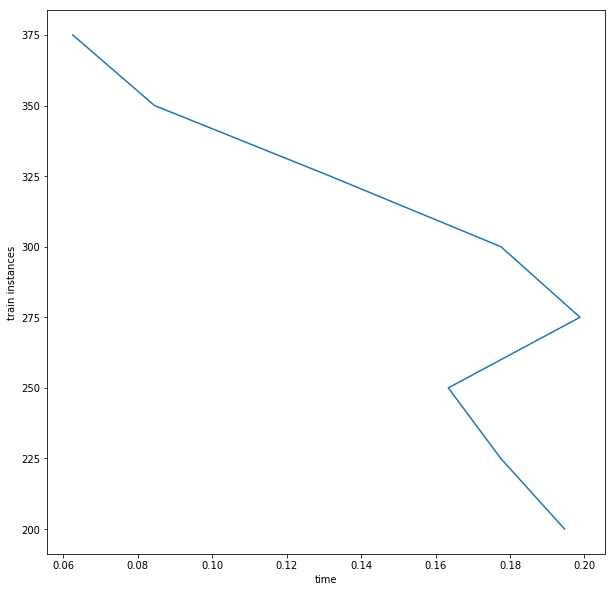

In [294]:
import matplotlib.pyplot as plt
plt.plot(t_,[200,225,250,275,300,325,350,375])
plt.xlabel("time")
plt.ylabel("train instances")
plt.show()

1. From the above plot we can see that as the training instances are increasing the exe time is decreasing, because there is no training part in KNN and my test data is getting lesser and lesser so, the testing time that constitute the majority of the time in KNN decreasing.

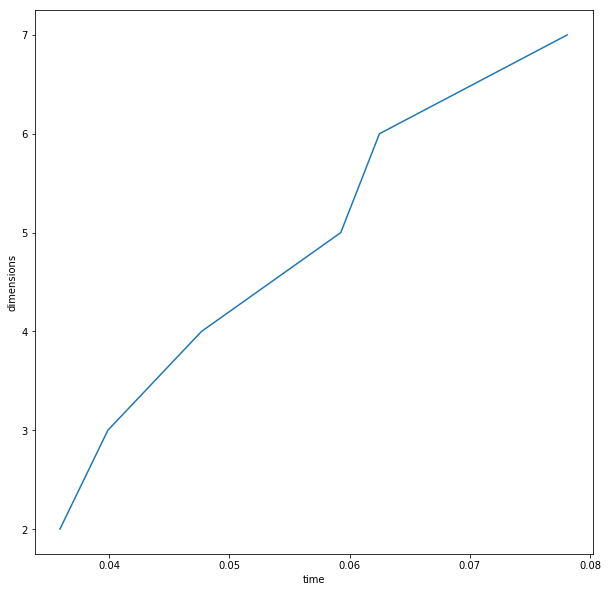

In [301]:
import matplotlib.pyplot as plt
plt.plot(t,[2,3,4,5,6,7])
plt.xlabel("time")
plt.ylabel("dimensions")
plt.show()

1. from the above time vs dimensions plot we can see that the execution time of KNN is increasing very fast as the dimension of the data is increasing. It is correct as we know that KNN is very epensive in terms of time complexity. 
2. It's time complexity depends on the dimensionality of the data set.

In [244]:
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## ANS 2 A

In [247]:
data = pd.read_csv('real.csv')
X = data.drop(['Y house price of unit area'],axis = 1)
y = data['Y house price of unit area']

In [248]:
X_test1 = X.tail(50)
y_test1 = y.tail(50)
X_train1= X.head(364)
y_train1= y.head(364)

In [249]:
X.shape,y.shape

((414, 7), (414,))

In [250]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
import math
kf = KFold(n_splits=5)
kf.get_n_splits(X)
avgmean = 0
cv_score = [] 
cv_train = []
opt_k = 0
opt_auc = 9999999999999999999999
KFold(n_splits=5, random_state=None, shuffle=False)
for i in range(1,25):
    avgmean = 0
    avgmean2 = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        k = KNN(n_neighbors=i)
        k.fit(X_train,y_train)
        prediction = k.predict(X_test)
        prediction1 = k.predict(X_train)
        m2 = mse(y_train,prediction1)
        avgmean2 = avgmean2 + math.sqrt(m2)
        m1 = mse(y_test,prediction)
        avgmean = avgmean + math.sqrt(m1)
    if opt_auc>avgmean/5:
        opt_auc = avgmean/5
        opt_k = i
    cv_score.append(avgmean/5)
    cv_train.append(avgmean2/5)
    print(i,'===========>>>>',avgmean/5)  
print("===="*4)
print("Optimum K is",opt_k,"with ",opt_auc," optimal RMSE")

1 ===========>>>> 12.536656931545439
2 ===========>>>> 10.919521932781294
3 ===========>>>> 10.564119141284522
4 ===========>>>> 10.014204534781483
5 ===========>>>> 9.628846155608588
6 ===========>>>> 9.419142047771057
7 ===========>>>> 9.42643373179246
8 ===========>>>> 9.34603349165079
9 ===========>>>> 9.197248463013757
10 ===========>>>> 9.169010422889642
11 ===========>>>> 8.96480696311769
12 ===========>>>> 8.946049986138458
13 ===========>>>> 8.9370616566727
14 ===========>>>> 8.904431334400972
15 ===========>>>> 8.899202418875115
16 ===========>>>> 8.917127401215
17 ===========>>>> 8.963668232528402
18 ===========>>>> 8.975109123394825
19 ===========>>>> 8.966074574757997
20 ===========>>>> 8.923617116528362
21 ===========>>>> 8.886590846977144
22 ===========>>>> 8.837960187632856
23 ===========>>>> 8.83126665517459
24 ===========>>>> 8.870192771739207
Optimum K is 23 with  8.83126665517459  optimal RMSE


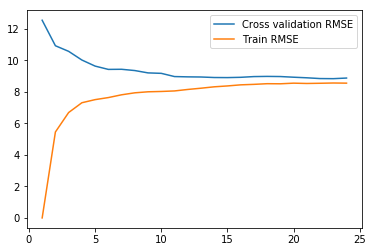

In [251]:
import  matplotlib.pyplot as plt
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
plt.plot(k,cv_score)
plt.plot(k,cv_train)
plt.legend(['Cross validation RMSE','Train RMSE'])
plt.show()

In [252]:
# Testing over the optimal parameters
k = KNN(n_neighbors=opt_k)
k.fit(X_train1,y_train1)
prediction = k.predict(X_test1)
prediction1 = k.predict(X_train1)
m1 = mse(y_test1,prediction)
m2 = mse(y_train1,prediction1)
train_rmse = math.sqrt(m1)
test_rmse = math.sqrt(m2)
print("Training RMSE on the optimal k",train_rmse)
print("Test RMSE on teh optimal k",test_rmse)

Training RMSE on the optimal k 7.270253841942246
Test RMSE on teh optimal k 8.682234206839281


1. In the previous on the same dataset I was getting an RMSE of 7.6877608175541825 on the test data, it is slightly that i am getting currently.

# ANS b

### impact of scale ->
1. if the datapoints in the dataset are not scale then it may produce some crazy results, by scaling we try to avoid the unit of the data points, eg : if we want to compare to data points having different units, then it will produce wrong result. But if we scale the dataset, while making comparsion we need not to care about the unit of the data points, we can find out distance directly between the data points.
2. As in case of KNN we directly find out the distnce between the data points so non scalled data may produce some crazy result in KNN.

In [253]:
data1 = data

In [254]:
data1.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [255]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data1.drop(['Y house price of unit area'],axis = 1))

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [256]:
Y = data1['Y house price of unit area'].values

In [257]:
Y = np.reshape(Y, (-1, 1))

In [258]:
X.shape,Y.shape

((414, 7), (414, 1))

In [259]:
x1 = pd.DataFrame(X)

In [260]:
y1 = pd.DataFrame(Y)

In [261]:
kf = KFold(n_splits=5)
kf.get_n_splits(x1)
avgmean = 0
cv_score = [] 
cv_train = []
opt_k = 0
opt_auc = 9999999999999999999999
KFold(n_splits=5, random_state=None, shuffle=False)
for i in range(1,25):
    avgmean = 0
    avgmean2 = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = x1.iloc[train_index], x1.iloc[test_index]
        y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
        k = KNN(n_neighbors=i)
        k.fit(X_train,y_train)
        prediction = k.predict(X_test)
        prediction1 = k.predict(X_train)
        m2 = mse(y_train,prediction1)
        avgmean2 = avgmean2 + math.sqrt(m2)
        m1 = mse(y_test,prediction)
        avgmean = avgmean + math.sqrt(m1)
    if opt_auc>avgmean/5:
        opt_auc = avgmean/5
        opt_k = i
    cv_score.append(avgmean/5)
    cv_train.append(avgmean2/5)
    print(i,'===========>>>>',avgmean/5)  
print("===="*4)
print("Optimum K is",opt_k,"with ",opt_auc," optimal RMSE")

1 ===========>>>> 11.847806813598373
2 ===========>>>> 10.140279459308129
3 ===========>>>> 9.363566973397274
4 ===========>>>> 9.093420451137805
5 ===========>>>> 9.143685243986948
6 ===========>>>> 9.049921354862756
7 ===========>>>> 8.871930438532608
8 ===========>>>> 8.808038174922865
9 ===========>>>> 8.808029545272777
10 ===========>>>> 8.886509960420463
11 ===========>>>> 8.879445000089248
12 ===========>>>> 8.915445538142462
13 ===========>>>> 8.967891869915288
14 ===========>>>> 8.958197606564612
15 ===========>>>> 8.966647220006736
16 ===========>>>> 8.981952359362644
17 ===========>>>> 9.022346771559505
18 ===========>>>> 9.042396705724082
19 ===========>>>> 9.069154810798144
20 ===========>>>> 9.063336120128167
21 ===========>>>> 9.059673694096563
22 ===========>>>> 9.072912730436933
23 ===========>>>> 9.086605641903386
24 ===========>>>> 9.105593985611417
Optimum K is 9 with  8.808029545272777  optimal RMSE


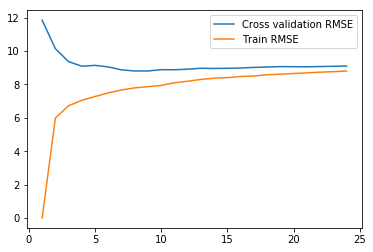

In [262]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
plt.plot(k,cv_score)
plt.plot(k,cv_train)
plt.legend(['Cross validation RMSE','Train RMSE'])
plt.show()

In [263]:
# Testing over the optimal parameters
X_test1 = x1.tail(50)
y_test1 = y1.tail(50)
X_train1= x1.head(364)
y_train1= y1.head(364)
k = KNN(n_neighbors=opt_k)
k.fit(X_train1,y_train1)
prediction = k.predict(X_test1)
prediction1 = k.predict(X_train1)
m1 = mse(y_test1,prediction)
m2 = mse(y_train1,prediction1)
train_rmse = math.sqrt(m1)
test_rmse = math.sqrt(m2)
print("Training RMSE on the optimal k",train_rmse)
print("Test RMSE on teh optimal k",test_rmse)

Training RMSE on the optimal k 8.409747284117165
Test RMSE on teh optimal k 7.836467064269632


## ANS 2 C

In [264]:
data2 = data
X_train, X_test, y_train, y_test = train_test_split(data2.drop(['Y house price of unit area'],axis = 1), data2['Y house price of unit area'], test_size=0.2, random_state=42)

In [265]:
X_train.shape,X_test.shape

((331, 7), (83, 7))

In [266]:
train_score = [] 
test_score = []
opt_k = 0
opt_auc = 9999999999999999999999
KFold(n_splits=5, random_state=None, shuffle=False)
print("Test RMSE for various K:")
for i in range(1,25):
        k = KNN(n_neighbors=i)
        k.fit(X_train,y_train)
        prediction = k.predict(X_test)
        prediction1 = k.predict(X_train)
        m2 = mse(y_train,prediction1)
        m1 = mse(y_test,prediction)
        test_score.append(math.sqrt(m1))
        train_score.append(math.sqrt(m2))
        print(i,'===========>>>>',math.sqrt(m1))  

Test RMSE for various K:
1 ===========>>>> 10.981709876300181
2 ===========>>>> 9.371557199171832
3 ===========>>>> 9.089605255168077
4 ===========>>>> 8.438873493741538
5 ===========>>>> 8.073379728525337
6 ===========>>>> 7.564588023671313
7 ===========>>>> 7.499486745818061
8 ===========>>>> 7.289639505936218
9 ===========>>>> 7.1618926016357065
10 ===========>>>> 7.266959474223041
11 ===========>>>> 7.301503993668081
12 ===========>>>> 7.361703633549748
13 ===========>>>> 7.419188021252937
14 ===========>>>> 7.329172848938608
15 ===========>>>> 7.352059988713634
16 ===========>>>> 7.395121748673976
17 ===========>>>> 7.257365745825617
18 ===========>>>> 7.269988422783792
19 ===========>>>> 7.219053227377971
20 ===========>>>> 7.1907682825951165
21 ===========>>>> 7.215181879055528
22 ===========>>>> 7.207672779638178
23 ===========>>>> 7.192271048816106
24 ===========>>>> 7.227229046605742


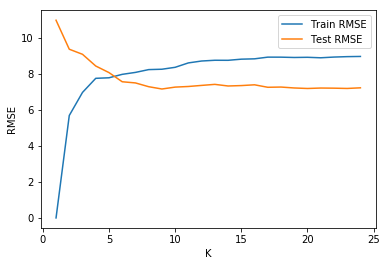

In [267]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
plt.plot(k,train_score)
plt.plot(k,test_score)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend(['Train RMSE','Test RMSE'])
plt.show()

1. From the above plot we can see that at k = 1, our model is overfitting as there is a large difference between Train and Test RMSE. 
2. As the K value increases My Train RMSE starts to increase and Test RMSE starts to decrease and at one point both are equal. It is the point at which my model is neither overfit nor underfit.
3. So I can say that k = 5 is the best k for this model.

In [268]:
k = KNN(n_neighbors=5)
k.fit(X_train,y_train)
prediction = k.predict(X_test)
prediction1 = k.predict(X_train)
m2 = mse(y_train,prediction1)
m1 = mse(y_test,prediction)
test_score.append(math.sqrt(m1))
train_score.append(math.sqrt(m2))
print(i,'TEST RMSE  :  ',math.sqrt(m1))
print(i,'TRAIN RMSE  :  ',math.sqrt(m2))

24 TEST RMSE  :   8.073379728525337
24 TRAIN RMSE  :   7.78497157845431


In [269]:
# Prediction done by my model on the test dataset
prediction

array([42.82, 38.42, 52.  , 50.3 , 27.42, 33.5 , 66.26, 59.72, 25.82,
       54.92, 23.72, 25.7 , 27.08, 27.08, 37.58, 27.44, 46.42, 49.9 ,
       26.32, 40.92, 16.76, 23.38, 41.54, 59.72, 17.26, 43.94, 16.08,
       59.3 , 42.98, 47.24, 16.56, 24.54, 34.28, 34.94, 50.62, 37.68,
       48.42, 17.26, 37.88, 40.3 , 47.42, 39.08, 53.28, 41.22, 36.86,
       63.68, 37.52, 22.74, 53.82, 46.7 , 53.52, 43.38, 39.22, 37.26,
       38.42, 20.08, 40.94, 23.24, 28.12, 50.98, 28.18, 34.1 , 17.98,
       17.36, 16.76, 26.8 , 34.52, 40.94, 43.12, 30.86, 45.66, 42.6 ,
       56.86, 58.2 , 36.96, 45.24, 40.58, 49.74, 45.28, 29.1 , 36.02,
       48.52, 31.44])

In [270]:
actual = y_test.values
rmse_list = []
i = 0
for val in prediction:
    rmse_list.append(abs(actual[i]-val))
    i = i+1

In [271]:
index = rmse_list.index(25.32)
print("Maximum RMSE is for ",index,"th home, with value of RMSE :",max(rmse_list))

Maximum RMSE is for  14 th home, with value of RMSE : 25.32


In [272]:
X_test.iloc[[14]]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
126,127,2013.083,38.6,804.6897,4,24.97838,121.53477


In [273]:
y_test.iloc[[14]] 

126    62.9
Name: Y house price of unit area, dtype: float64

In [274]:
X_test

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,359,2013.167,1.1,193.58450,6,24.96571,121.54089
350,351,2013.000,13.2,492.23130,5,24.96515,121.53737
373,374,2013.083,0.0,274.01440,1,24.97480,121.53059
399,400,2012.917,12.7,170.12890,1,24.97371,121.52984
369,370,2012.667,20.2,2185.12800,3,24.96322,121.51237
72,73,2013.583,32.5,424.54420,8,24.97587,121.53913
262,263,2012.917,15.9,289.32480,5,24.98203,121.54348
140,141,2013.250,16.2,289.32480,5,24.98203,121.54348
93,94,2012.917,31.9,1146.32900,0,24.94920,121.53076
70,71,2013.583,6.6,90.45606,9,24.97433,121.54310


1. If we see that test dataset then we are getting the worst RMSE for 14 datapoint that is given by row number 126. From the dataset we can see that it is among some of the oldest houses in the dataset and at the same time the distance to the nearest metro station is also too much. So we are getting the worse value of RMSE.
2. We can imporve it by scalling the fetures.
3. By finding value of k using K-fold cross validation.

## ANS 3 

In [275]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [276]:
# Convert data type to pandas dataframe

# http://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [277]:
data_v = data[['sepal length (cm)','sepal width (cm)']]

In [278]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(data_v)

In [279]:
s = data.loc[data['target'] == 0]
v = data.loc[data['target'] == 1]
V = data.loc[data['target'] == 2]

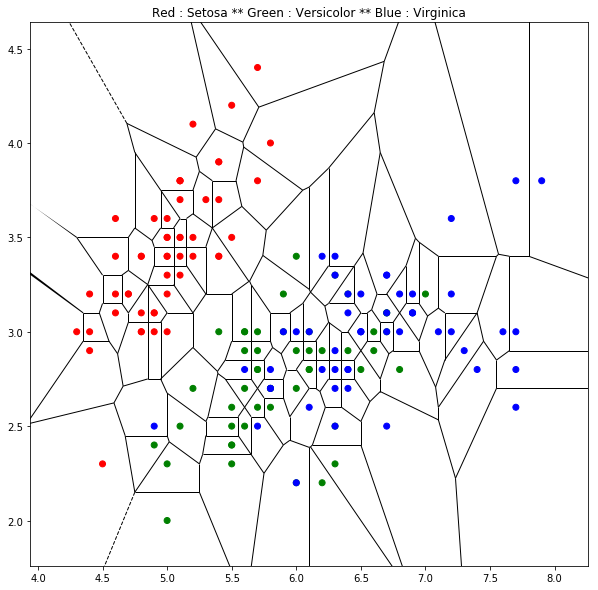

In [282]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib
voronoi_plot_2d(vor, show_vertices=False, show_points=False)
my_colors = ["red", "green", "blue"]
x = plt.scatter(x=data["sepal length (cm)"],y=data["sepal width (cm)"],c=data["target"],\
            cmap=matplotlib.colors.ListedColormap(my_colors))
plt.title("Red : Setosa ** Green : Versicolor ** Blue : Virginica")
plt.show()

1. From the above vornoi diagram we can conclude that if I have given the sepal width and sepal length of the species I can 
clearly say whether it belong to setosa or not. As on the basic of these two features I am able to distinguish my set

References :
    https://www.geeksforgeeks.org/python-maximum-minimum-elements-position-list/
    https://stackoverflow.com/questions/16096627/selecting-a-row-of-pandas-series-dataframe-by-integer-index
    https://stackoverflow.com/questions/5469286/how-to-get-the-index-of-a-maximum-element-in-a-numpy-array-along-one-axis
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html